***
# Exploration des données
***

Note : 
Extraire les nom propres
faire une liste des mots les plus populaires
Analyser les émoji
L'usage de majuscule
Graph les top mot par catégorie

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
# ====== Déterminer les path ====== #
import os
cwd = os.getcwd()
parent = os.path.dirname(cwd)
data_path = parent + '\\data\\'

# ====== Importer les df ====== #
comments = pd.read_csv(data_path + 'Comments.csv')
posts = pd.read_csv(data_path + 'Posts.csv')
comments.head(2)

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,created_time,id,like_count,message,parent,postId
0,0.102216,0.651296,0.664565,0.350583,0.029933,0.588517,0,2023-06-02T16:06:59+0000,722477749883613_788168749338745,0,"Faux, ce ne sera jamais le temps pour lui car ...",NaN,192978590727638_722477749883613
1,0.005476,0.167515,0.255499,0.006981,0.005647,0.176317,1,2023-06-02T16:21:43+0000,722477749883613_1593974021087773,1,Mon dieu!! On nous prend sérieusement pour des...,NaN,192978590727638_722477749883613


In [13]:
comments_describe = comments.describe().applymap(lambda x: f"{x:0.2f}")
comments_describe

,IDENTITY_ATTACK,INSULT,PROFANITY,SEVERE_TOXICITY,THREAT,TOXICITY,comment_count,like_count
count,935698.00,935698.00,935698.00,935698.00,935698.00,935698.00,935698.00,935698.00
mean,0.01,0.11,0.05,0.01,0.01,0.10,0.52,1.32
std,0.04,0.16,0.12,0.06,0.04,0.14,2.99,5.97
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.00
50%,0.00,0.03,0.01,0.00,0.01,0.03,0.00,0.00
75%,0.01,0.14,0.02,0.00,0.01,0.15,0.00,1.00
max,0.95,0.97,1.00,0.95,0.97,0.98,252.00,836.00


In [9]:
posts_describe = posts.describe().applymap(lambda x: f"{x:0.2f}")
posts_describe

,shares
count,37504.00
mean,21.30
std,185.82
min,0.00
25%,0.00
50%,2.00
75%,9.00
max,25872.00


In [12]:
interraction_describe = pd.merge(comments_describe[['comment_count', 'like_count']], posts_describe, left_index=True, right_index=True)
interraction_describe

,comment_count,like_count,shares
count,935698.00,935698.00,37504.00
mean,0.52,1.32,21.30
std,2.99,5.97,185.82
min,0.00,0.00,0.00
25%,0.00,0.00,0.00
50%,0.00,0.00,2.00
75%,0.00,1.00,9.00
max,252.00,836.00,25872.00


In [29]:
# Merge les df
df_merge = pd.merge(comments, posts, left_on='postId', right_on='id', indicator=True, suffixes=('_comments', '_posts'))

# Analyse du merge 
unique_list = []
for value in df_merge['_merge'].unique():
    unique_list.append(value)

if unique_list == 'both':
    print('Merge : Tous les lignes merge')
else :
    print('Merge : Pas toute les lignes merge')

Merge : Pas toute les lignes merge


In [30]:
# Valeurs manquantes
print('Missing value')
print('*'*25)
print(f'Nombre de lignes : {len(df_merge)}')
for col in df_merge.columns.to_list():
    nb_na = df_merge[col].isna().sum()
    perc = round(df_merge[col].isna().sum()/len(df_merge)*100)
    print(f'{col.ljust(20)} : {str(nb_na).rjust(10)} ({perc}%)')

Missing value
*************************
Nombre de lignes : 935698
IDENTITY_ATTACK      :          0 (0%)
INSULT               :          0 (0%)
PROFANITY            :          0 (0%)
SEVERE_TOXICITY      :          0 (0%)
THREAT               :          0 (0%)
TOXICITY             :          0 (0%)
comment_count        :          0 (0%)
created_time_comments :          0 (0%)
id_comments          :          0 (0%)
like_count           :          0 (0%)
message_comments     :          0 (0%)
parent               :     459661 (49%)
postId               :          0 (0%)
attachments.data     :         35 (0%)
created_time_posts   :          0 (0%)
id_posts             :          0 (0%)
mainTopic            :       8481 (1%)
message_posts        :      10158 (1%)
permalink_url        :          0 (0%)
secondTopic          :      67076 (7%)
shares               :          0 (0%)
title                :       8457 (1%)
_merge               :          0 (0%)


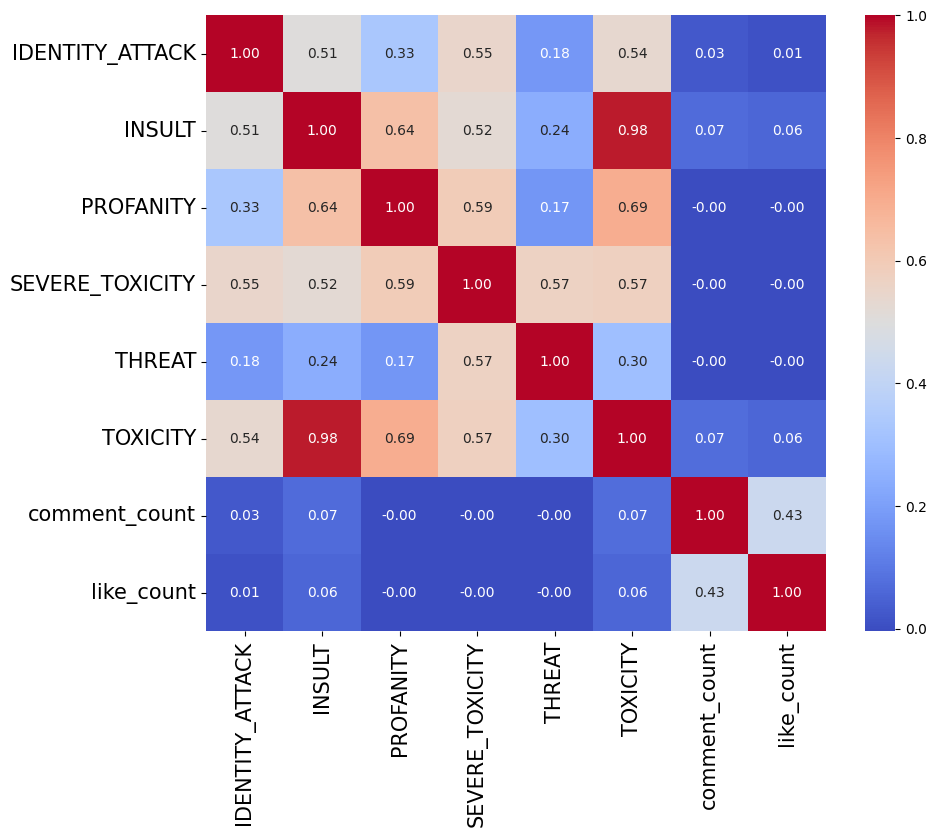

In [35]:
correlation_df = comments.copy()

correlation_df = correlation_df.loc[correlation_df["comment_count"]>0]

cols = ['IDENTITY_ATTACK',
 'INSULT',
 'PROFANITY',
 'SEVERE_TOXICITY',
 'THREAT',
 'TOXICITY',
 "comment_count",
 "like_count"]
correlation_df.describe().applymap(lambda x: f"{x:0.2f}")


correlation_matrix = correlation_df[cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", xticklabels=cols, yticklabels=cols)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.savefig(parent + '\\figures\\' + 'correlation_matrix.png')

plt.show()

In [42]:
maintopic = df_merge.groupby('mainTopic').size().to_frame('count_mainTopic').sort_values(by=['count_mainTopic'], ascending=False).reset_index()
top_maintopic = maintopic.loc[maintopic.index < 100]
top_maintopic.head(10)

,mainTopic,count_mainTopic
0,actualite,343101
1,2022,147892
2,actualites,94162
3,2023,72744
4,opinions,50246
5,arts,29922
6,affaires,29686
7,le-mag,22014
8,553956616735728,19650
9,chroniques,15153


In [43]:
secondtopic = df_merge.groupby('secondTopic').size().to_frame('count_secondTopic').sort_values(by=['count_secondTopic'], ascending=False).reset_index()
top_secondtopic = secondtopic.loc[secondtopic.index < 100]
top_secondtopic.head(10)

,secondTopic,count_secondTopic
0,covid-19,138599
1,la-capitale,42421
2,justice-et-faits-divers,35329
3,05,28119
4,le-fil-groupe-capitales-medias,26662
5,point-de-vue,24792
6,04,24301
7,politique,21513
8,06,20275
9,02,19528


In [47]:
top_topic = pd.merge(top_maintopic, top_secondtopic, left_index=True, right_index=True)
top_topic.head(10)

,mainTopic,count_mainTopic,secondTopic,count_secondTopic
0,actualite,343101,covid-19,138599
1,2022,147892,la-capitale,42421
2,actualites,94162,justice-et-faits-divers,35329
3,2023,72744,05,28119
4,opinions,50246,le-fil-groupe-capitales-medias,26662
5,arts,29922,point-de-vue,24792
6,affaires,29686,04,24301
7,le-mag,22014,politique,21513
8,553956616735728,19650,06,20275
9,chroniques,15153,02,19528
